########### Use the values below for the digital compensator ZOH###########

// Fz= 10  Hz    Fp= 1000  Hz  Fs= 48000  Hz
#define VAS1 (1.8771413837316515f)
#define VAS2 (-0.8771413837316514f)
#define VBS0 (1.9424366273056421f)
#define VBS1 (0.0025409805314674395f)
#define VBS2 (-1.939895646774175f)


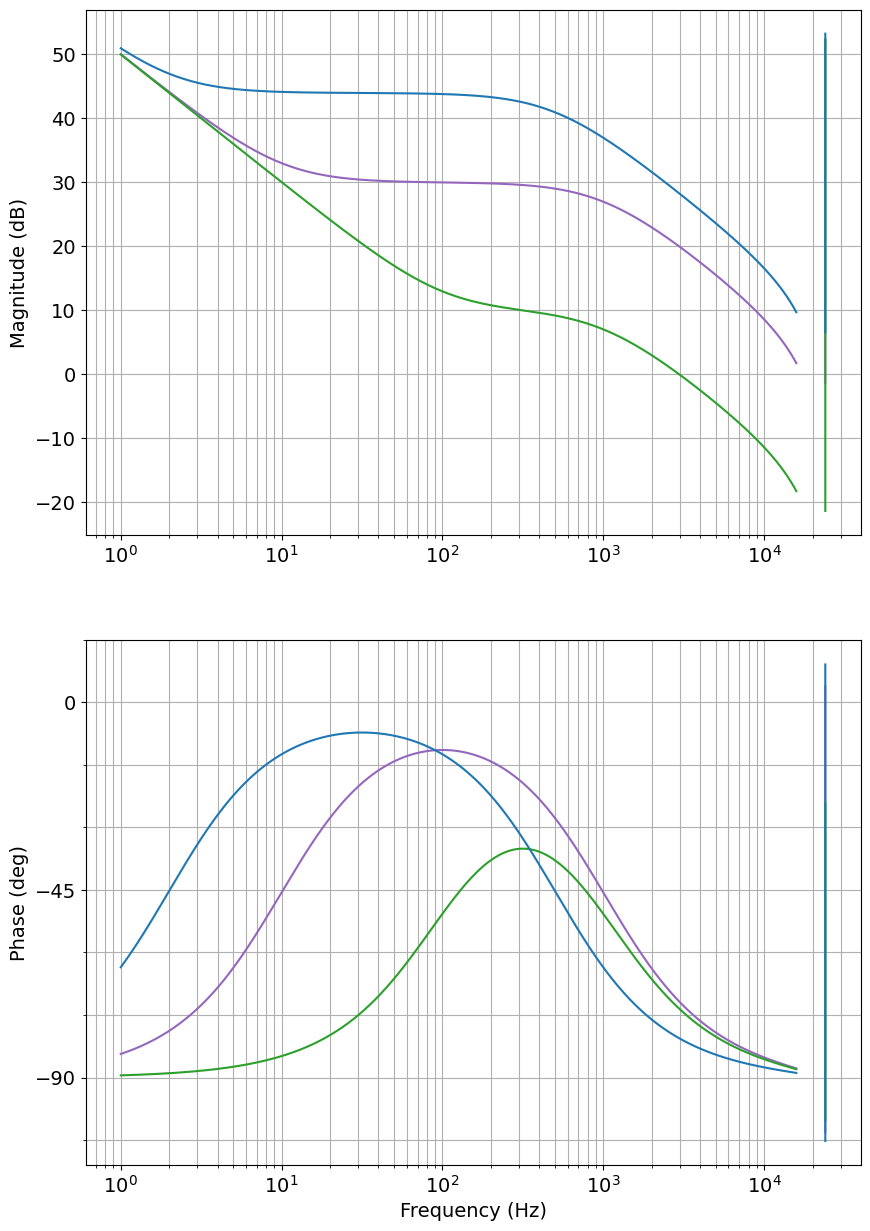

In [4]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import numpy as np
import time
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = 10.0,15.0
import os
import control

f = np.logspace(0,4.2,1000)
f.min()
f.max()
len(f)
w = 2*np.pi*f
s = control.TransferFunction.s

#################################################################
#Use Fp0 for the gain amplification of the system
Fsw = 48000 #Hz
Fp0 = 316#Hz
Fz1 = 10 #Hz -adjustable
Fp1 = 1000 #Hz - adjustale
# Fp1 = 5000 #Hz

Ts = (1/Fsw)
Wp0=(Fp0*2*np.pi)
Wz1=(Fz1*2*np.pi)
Wp1=(Fp1*2*np.pi)

B0 = ((Ts*Wp0*Wp1*(2+Ts*Wz1)) / (2*(2+Ts*Wp1)*(Wz1)))
B1 = ((Ts*Ts*Wp0*Wp1) / (2+Ts*Wp1))
B2 = ((Ts*Wp0*Wp1*(-2+Ts*Wz1)) / (2*(2+Ts*Wp1)*Wz1))

A0 = 1
A1 = (4 / (2+Ts*Wp1))
A2 = (-2+Ts*Wp1) / (4 / 2+Ts*Wp1)

print("########### Use the values below for the digital compensator ZOH###########\n")
print ("// Fz=",int(Fz1), " Hz    Fp=", int(Fp1)," Hz", " Fs=",int(Fsw)," Hz"  )
print(f"#define VAS1 ({A1}f)")
print(f"#define VAS2 ({A2}f)")
print(f"#define VBS0 ({B0}f)")
print(f"#define VBS1 ({B1}f)")
print(f"#define VBS2 ({B2}f)")


Fsw = 48000 #Hz
Fp0 = 316#Hz
Fz1 = 100 #Hz -adjustable
Fp1 = 1000 #Hz - adjustale

Ts = (1/Fsw)
Wp0=(Fp0*2*np.pi)
Wz1=(Fz1*2*np.pi)
Wp1=(Fp1*2*np.pi)

vB0 = ((Ts*Wp0*Wp1*(2+Ts*Wz1)) / (2*(2+Ts*Wp1)*(Wz1)))
vB1 = ((Ts*Ts*Wp0*Wp1) / (2+Ts*Wp1))
vB2 = ((Ts*Wp0*Wp1*(-2+Ts*Wz1)) / (2*(2+Ts*Wp1)*Wz1))
vA0 = 1
vA1 = (4 / (2+Ts*Wp1))
vA2 = (-2+Ts*Wp1) / (4 / 2+Ts*Wp1)


Fsw = 48000 # Hz
Fp0 = 316   # Fp0 = the gain at f=1Hz e.g. Fp0=10 Gain=10 @ 1Hz 316=50dB
Fz1 = 2     # Hz -adjustable
Fp1 = 500   # Hz - adjustale

Ts = (1/Fsw)
Wp0=(Fp0*2*np.pi)
Wz1=(Fz1*2*np.pi)
Wp1=(Fp1*2*np.pi)

VVB0 = ((Ts*Wp0*Wp1*(2+Ts*Wz1)) / (2*(2+Ts*Wp1)*(Wz1)))
VVB1 = ((Ts*Ts*Wp0*Wp1) / (2+Ts*Wp1))
VVB2 = ((Ts*Wp0*Wp1*(-2+Ts*Wz1)) / (2*(2+Ts*Wp1)*Wz1))
VVA0 = 1
VVA1 = (4 / (2+Ts*Wp1))
VVA2 = (-2+Ts*Wp1) / (4 / 2+Ts*Wp1)

k=1
hIIRReversed    = control.tf([B0*k, B1*k, B2*k], [A0,-A1, -A2], Ts)
hIIRReversedp   = control.tf([vB0*k, vB1*k, vB2*k], [vA0,-vA1, -vA2], Ts)
hIIRReversedpp  = control.tf([VVB0*k, VVB1*k, VVB2*k], [VVA0,-VVA1,
-VVA2], Ts)
bodeIIRReversed = control.bode(hIIRReversed, w, dB=1,Hz=1,color='tab:purple')
bodeIIRReversedp= control.bode(hIIRReversedp, w, dB=1,Hz=1,color='tab:green')
bodeIIRReversedpp = control.bode(hIIRReversedpp, w, dB=1,Hz=1,color='tab:blue')